In [1]:
import meep as mp
import numpy as np
from meep import mpb
import matplotlib.pyplot as plt
from lattice import *
from sweep_util import *


del_w, del_a, del_hy, del_hx = 0.05, 0.001, 0.025, 0.025
w_max ,a_max = 0.7, 0.45
w_min, a_min, hy_min, hx_min = 0.65, 0.25, 0.1, 0.05

## Poly Spacing Set - up

In [2]:
number_of_tapered_holes = 10

hx = 0.25
hy = 0.45
w = 0.65
a_center = 0.374
a_mirror = 0.43
h = 0.19

substrate = True
mode = "yO"

lattice = OneDLattice(Lx = 20, filename = "sub_190_yO.hdf5")
z = lattice.polynomial_elliptical_hole_taper(number_of_tapered_holes = number_of_tapered_holes, 
                                       hx = hx, 
                                       hy = hy, 
                                       w = w, 
                                       a_center = a_center, 
                                       a_mirror = a_mirror)
lattice.apply_poly_spacing()

> /home/sudhang/github_cloned_dir/CavitySimulations/cavity_design/lattice.py(441)polynomial_fit()
    439     a_interest = a_list[ np.where(gamma_arr > 0)][ : len(gamma_interest) ]
    440     breakpoint()
--> 441     p_coeff = np.polyfit(gamma_interest, a_interest, degree)       # degress of freedom for the polynomial
    442 
    443     return p_coeff

ipdb> c


/home/sudhang/github_cloned_dir/CavitySimulations/cavity_design/lattice.py:340: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = polynomial_fit(self.data, w , hy, hx , gamma_mirror, degree = 8 )


> /home/sudhang/github_cloned_dir/CavitySimulations/cavity_design/lattice.py(347)polynomial_elliptical_hole_taper()
    345         a_arr.sort()
    346         breakpoint()
--> 347         self.poly_spacing = np.append(a_arr, np.zeros(N_mirror))
    348 
    349         for i in range(N_mirror):

ipdb> c


In [ ]:
np.round(lattice.poly_spacing,3)
lattice.poly_spacing

In [ ]:
#------------------- check if spacings and coordinates are correct --------------------#
for i in range(19):
    print( lattice.poly_spacing[i+1] - 2 * (lattice.coordinates[i + 1][0] - lattice.coordinates[i][0]) + lattice.poly_spacing[i])


## Pow Spacing Set - up

In [ ]:
#------------------ Pow Spacing Set - up ---------------------#
N_taper = 10
hx = 0.143
hy = 0.315
w = 0.65
a_center = 0.314
a_mirror = 0.361
Lx = 20
h = 0.22
lattice = OneDLattice(Lx = Lx)
spacings = lattice.pow_degree_a_taper(N_taper, hx, hy , w , a_center, a_mirror)
lattice.apply_pow_spacing()

In [ ]:
lattice.pow_spacing

In [ ]:
#------------------ Normal Spacing Set - up ---------------------#
lattice = OneDLattice(Lx = 20)
lattice.normal_spacing(0.303, 0.143, 0.315)
lattice.coordinates

## To check lower band edges of mirror segments vs. w_target

In [ ]:
#----------- To check lower band edges of mirror segments vs. w_target ----------#

band_upper = []
band_lower = []
target_f = []

a_range = lattice.poly_spacing
#a_range = lattice.pow_spacing
#a_range = np.arange(0.25, 0.275, 0.001)

for a in a_range:
    
    freq = np.array(get_freqs(hx = hx, hy = hy, a = a, w = w, h = h, 
                              mode = mode, substrate = substrate))
    
    freq[0] = convert_freq_to_Thz(freq[0], a)
    freq[1] = convert_freq_to_Thz(freq[1], a)

    freq_target = convert_freq_to_Thz(1/1.54) * 1.01 
    
    band_lower.append(freq[0])
    band_upper.append(freq[1])
    target_f.append(freq_target)
    


In [ ]:
plt.xticks(np.round(np.linspace(a_range[0], a_range[-1], 7), 3))
plt.title("hx = {}. hy = {}, w = {}, h = {}, mode = {}, substrate = {}".format(hx, hy, w, h, mode, substrate))
plt.xlabel("a")
plt.ylabel("Frequency in Thz")
plt.plot(a_range,target_f, 'r', label = "target_f" )
plt.plot(a_range,band_lower, 'bx', label = "band_lower" )
plt.plot(a_range,band_upper, 'rx', label = "band_upper" )
plt.grid()
plt.legend()

## Plot mirror strength for the range $a - range$ 

In [ ]:
#------- Plot mirror strength for the range a_range -------#

mirror_strength = []

a_range = lattice.poly_spacing
#a_range = lattice.pow_spacing

for a in a_range: 
     freq = get_freqs(hx = hx, hy = hy, a = a, w = w, h = h, 
                      mode = mode, substrate = substrate)
        
     mirror_strength.append(get_gamma(freq, a))

x_range = np.array(range(len(a_range))) + 1

plt.xticks(x_range)
plt.title("hx = {}. hy = {}, w = {} , h = {}, a = ({},{}), mode = {}, sub = {}".format(hx, hy, w, h , a_center, a_mirror, mode, substrate), pad = 10)
plt.xlabel("Mirror Segment Number", labelpad = 10)
plt.ylabel("Mirror Strength", labelpad = 10)
plt.grid()
plt.plot(x_range, mirror_strength, 'x')
#plt.plot( a_range, mirror_strength, 'x')

# hdf5 Data Analysis / General 

In [ ]:
import h5py
import numpy as np
# ------------ to find a_cen for resonance from the hdf5 file -----------------#
with h5py.File("sub_190_yO.hdf5") as f:
    gamma = np.array(f.get("gamma"))
    
    freq = np.array(f.get("freq"))

In [ ]:
a_range = np.linspace(0.34 , 0.4, 20)
mirror_str = []
for a in a_range:
    mirror_str.append(get_gamma(get_freqs(hx = 0.143, hy = 0.315, a = a, wy = 0.65, h = 0.25), a = a))

plt.plot(a_range, mirror_str, 'bx')

In [ ]:
#------------------------------------------------#
#      Plotting gamma vs. desired slice
#------------------------------------------------#

data = load_data(filename = "sweep_data(1).hdf5")
pow = 1

a_mirror = 0.347
gamma_mirror = data[index_w, index_a, index_hy, index_hx]

a_list = np.arange( a_min, a_max, del_a)
gamma_arr = data[index_w, :, index_hy, index_hx]

gamma_NZ = gamma_arr[ gamma_arr > 0]

gamma_interest = gamma_NZ[ : np.where( (gamma_NZ == gamma_mirror))[0][0]]
a_interest = a_list[ np.where(gamma_arr > 0)][ : len(gamma_interest) ]


# X = np.arange(a_min, a_max, del_a)** pow
# Y = data[index_w, : , index_hy, index_hx]

X = gamma_interest
Y = a_interest

plt.xlabel("a^{}(nm)".format(pow))
plt.ylabel("Mirror Strength ")

plt.title("hx = {}, hy = {}, w = {} (nm)".format( hx * 1000, hy * 1000, w * 1000))

#plt.stem(X,Y, linefmt = "C0--")
#plt.xticks(np.arange(hx_min, a - 0.07, del_hx) )

plt.plot(a_interest, gamma_interest)
#plt.plot(Y[Y>0], X[X > 0.3899],'-')
#plt.plot(X[X > 0.3899], Y[Y>0], '-')
print(a_interest[0])
#plt.show()

In [ ]:
hx = 0.25
hy = 0.45
a = 0.4
w = 0.7

# mirror_str = []
# for a in np.arange(0.4, 0.401, 0.001):
#     mirror_str.append(get_gamma(get_freqs(hx, hy, a , w), a))

get_gamma(get_freqs(hx, hy, a , w), a)

In [ ]:
import seaborn as sb
heat_map = sb.heatmap(data)
plt.xlabel("(hy-hy_min)/del_hy", labelpad = 20, fontsize='large', fontweight='bold')
plt.ylabel("(a - a_min)/del_a", labelpad = 20, fontsize='large', fontweight='bold')
plt.title("hx = {} nm, w = {} nm".format(hx*1000, w * 1000), fontsize='large', fontweight='bold', pad = 20)

In [ ]:
hx = 0.2 
hy = 0.35 
a = 0.383 
w = 0.65
index_w ,index_a, index_hy, index_hx = get_index(w, a, hy, hx)



In [ ]:
param_range = np.arange(0.390, 0.440, 0.002)
for a_i in param_range:
    print(get_freq_Thz(hx = hx, hy = hy, a = a_i, w = w, substrate= True, mode= "zEyO", h = 0.19))

In [ ]:
# #----------------- Load and clean data ---------------------#

# hf = h5py.File('sweep_data(1).hdf5', 'r')
# data = np.array( hf.get("data"))
# data = data
# hf.close()



# x = np.where(data == - 1)
# for i in range(len(x[0])):
#     data[x[0][i], x[1][i], x[2][i], x[3][i] ] = 0    # data cleaning 

In [ ]:
get_gamma_from_Thz(get_freq_Thz(hx = hx, hy = hy, a = 0.345, w = w, substrate= True, mode= "yO", h = 0.19), 
                   check_freq = 196.75324675324677)

In [6]:
get_freq_Thz(hx = 0.25, hy = 0.5, a = 0.371, w = 0.7, substrate= True, mode= "yO", h = 0.19)

 h = 0.19, SUBSTRATE = True, mode = yO
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 80 x 80.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1.88679,0.512129)
          axes (1,0,0), (0,1,0), (0,0,1)
     ellipsoid, center = (0,0,0)
          size (0.673854,1.34771,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-1.12803)
          size (1e+20,1e+20,1.74394)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 27 object nodes (vs. 3 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: yodd.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 

array([196.33582664, 271.48989656])

## Not sure what this is

In [ ]:
def a_normal_cavity(geom = None, n_segments=20, waveguide_parameters= None, substrate_parameters=None):    
    
    if geom is None:
        geom = []

    if waveguide_parameters is None:
        waveguide_parameters = {}

    if substrate_parameters is None:
        substrate_parameters = {}

    geom = add_waveguide_1d(geom=geom)

    geom, _ = _a_tapering(geom=geom, n_segments=n_segments)

    # geom = add_substrate(geom=geom, **substrate_parameters)                                                           
    return geom

In [ ]:
def _a_normal_tapering(geom=None, n_segments=20, material_holes=mp.vacuum):
    
    if geom is None:
        geom = []
    material_holes = index_to_material(material_holes)

    _cavity = OneDLattice(Lx = n_segments)
    _cavity.normal_spacing(a = 0.303, hx = 0.143, hy = 0.315)
    
    for x, y, z, hx, hy in _cavity.coordinates:
        # holes are completely filled with tuning material:
        geom.append(mp.Ellipsoid(material=material_holes,
                                         center=mp.Vector3(x, y, z),
                                         size=mp.Vector3(hx, hy, mp.inf)
        geom.append(mp.Ellipsoid(material=material_holes,
                                         center=mp.Vector3(-x, y, z),
                                         size=mp.Vector3(hx, hy, mp.inf)))
                                 
    return geom, length

# Checking For Polynomial Fitting


In [ ]:
gamma_interest = np.array([0.0167, 0.0314, 0.0409, 0.0484, 0.0548, 0.0602, 0.0655, 0.0703,
       0.0749, 0.0791, 0.0829, 0.0865, 0.0899, 0.0928, 0.0958, 0.0987,
       0.1014, 0.1038, 0.1061, 0.1083, 0.1102, 0.1122, 0.1141, 0.1161,
       0.1151, 0.117 , 0.1188, 0.1205, 0.1222, 0.1238, 0.1253, 0.1268,
       0.1282, 0.1296, 0.1309, 0.1321, 0.1334, 0.1345, 0.1356, 0.1364,
       0.1373, 0.1381, 0.1389, 0.1395, 0.1402, 0.1405, 0.1411, 0.1417,
       0.1423, 0.1428, 0.1433, 0.1439, 0.1442, 0.1446, 0.1449, 0.1438,
       0.1442, 0.1445, 0.1448, 0.1451, 0.1453, 0.1455, 0.1456, 0.1458,
       0.1459])

a_interest = np.array([0.384, 0.385, 0.386, 0.387, 0.388, 0.389, 0.39 , 0.391, 0.392,
       0.393, 0.394, 0.395, 0.396, 0.397, 0.398, 0.399, 0.4  , 0.401,
       0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408, 0.409, 0.41 ,
       0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417, 0.418, 0.419,
       0.42 , 0.421, 0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428,
       0.429, 0.43 , 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437,
       0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444, 0.445, 0.446,
       0.447, 0.448])

In [ ]:
poly = np.poly1d(np.polyfit(gamma_interest, a_interest, deg = 8))
plt.plot(np.arange(0.02, 0.14, 0.001), poly(np.arange(0.02, 0.14, 0.001)))
plt.plot(gamma_interest, a_interest, 'x')

# Mode Analysis

The code below imports a get_freqs and is used to modify the output from the modesolver object to analyze mode profiles.

- Plotting Fields and Epsilon Function
- 




In [5]:
def get_freqs(hx , hy , a , w , h = 0.22, substrate = False, output_epsilon = False ,mode = "zEyO", num_bands = 2):
    
    # h = 0.23    # for manually setting waveguide height 
    res = 20
    #mode = "zEyO"
    resolution = res  # pixels/a, taken from simpetus example
    
    print(" h = " + str(h) + ", SUBSTRATE = " + str(substrate) + ", mode = " + str(mode))
    
    a = round(a,3)        # units of um
    h = round(h, 3)         # units of um
    w = round(w, 3)         # units of um
    hx = round(hx, 3)
    hy = round(hy, 3)
    
    h = h/a          # units of "a"       
    w = w/a          # units of "a"
    hx = hx/a        # units of "a"
    hy = hy/a        # units of "a"
    
    cell_x = 1
    cell_y = 4
    cell_z = 4


    nSi = 3.45
    Si = mp.Medium(index=nSi)

    geometry_lattice = mp.Lattice(size=mp.Vector3(cell_x , cell_y , cell_z)) # dimensions of lattice taken from simpetus example

    geometry = [ mp.Block(center=mp.Vector3(), size=mp.Vector3(mp.inf, w ,h ), material=Si),
             mp.Ellipsoid(material=mp.air,
             center=mp.Vector3(),
             size=mp.Vector3(hx,hy,mp.inf)) ]
    
    if substrate:
        geometry = add_substrate(geom = geometry, waveguide_height = h, substrate_height = cell_z/2 - h/2 )  # substrate height normalized with a 


    k_points = [mp.Vector3(0.5, 0, 0)]
    
    num_bands = num_bands 

    ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                        geometry=geometry,
                        k_points=k_points,
                        resolution=resolution,
                        num_bands=num_bands)

    if mode == "vanilla":
        
        ms.run(mpb.fix_efield_phase) # running for all modes and extracting parities
        
    if mode == "zEyO":
        
        ms.run_yodd_zeven(mpb.fix_efield_phase)
    
    if mode == "yO":
        
        ms.run_yodd(mpb.fix_efield_phase)
        
    if mode == "yE":
        
        ms.run_yeven(mpb.fix_efield_phase)
    
    e_field = ms.get_efield(1, bloch_phase= True)
    eps = ms.get_epsilon()
    
    return (e_field, eps)

In [6]:
def add_substrate(geom=None, waveguide_height = 0.22, substrate_height = 5, material=mp.Medium(index=1.44)):
    """
    Creates a (by default SiO2) substrate.
    If the unlike case occurs that we need to change the center, we could again make everything relative to the center
    of the substrate.
    """
    if geom is None:
        geom = []

    _center = mp.Vector3(0, 0, -waveguide_height/2 - substrate_height/2)

    geom.append(mp.Block(material= material, 
                         center=_center, 
                         size= mp.Vector3(mp.inf, 
                                          mp.inf, 
                                          substrate_height)))
                
    return geom

In [ ]:
e_field, eps = get_freqs(hx = 0.25, hy = 0.45, w = 0.65, h = 0.19, mode = 'vanilla', substrate = False, a= 0.374 )

In [ ]:
np.real(np.array(e_field))

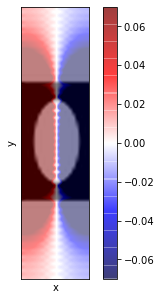

In [10]:
#plt.style("seaborn")
plt.figure(figsize=(5,5))
plt.imshow(eps[:, :, 39].T, cmap = 'binary', interpolation = 'spline36')
plt.imshow(e_field[:, :, 39, 1].real.T, cmap = 'seismic', alpha = 0.5, interpolation = 'spline36', 
           vmin = -0.07 , vmax= 0.07)

plt.gca().invert_yaxis()
plt.colorbar()
#plt.title("e_field.y (hx = 0.275, hy = 0.5, w = 0.7, h = 0.19, mode = 'yO', substrate = True, a= 0.385 )")
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(ticks = [])
plt.yticks(ticks = [])
plt.show()